In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
import time
import glob

In [31]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",200)

In [32]:
os.getcwd()

'/Users/nicoroble/adtech-compe-2018-e/ml/notebook'

In [33]:
file_path = glob.glob("../../data/*")
csv_path = glob.glob("../../data/*.csv")

In [34]:
file_path

['../../data/banner_size_master.csv',
 '../../data/click_counts_media_dict.pickle',
 '../../data/media_dict.pickle',
 '../../data/demogra.csv',
 '../../data/train.csv',
 '../../data/cpc_budget.json',
 '../../data/demogra_cleaned.csv',
 '../../data/banner_position_master.csv',
 '../../data/device_type_master.csv']

In [35]:
csv_path

['../../data/banner_size_master.csv',
 '../../data/demogra.csv',
 '../../data/train.csv',
 '../../data/demogra_cleaned.csv',
 '../../data/banner_position_master.csv',
 '../../data/device_type_master.csv']

# read data 

In [36]:
banner_size_master = pd.read_csv(csv_path[0])
demogra = pd.read_csv(csv_path[1])
df_train = pd.read_csv(csv_path[2])
banner_position_master = pd.read_csv(csv_path[3])
device_type_master = pd.read_csv(csv_path[4])

In [37]:
banner_size_master

,id,bannerSize
0,1,320×50
1,2,320×100
2,3,300×250
3,4,320×480


In [38]:
demogra.head()

,deviceId,age,gender,hasChild,income,isMarried
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,36.0,female,yes,458.0,yes
1,57525600-3f29-4ff9-b236-ea32fc43d78c,52.0,female,no,678.0,no
2,18221f19-865b-4923-a5a9-ea13239d3aad,40.0,female,no,NaN,NaN
3,68a69f8a-a3d6-467a-832a-04f626737a81,42.0,UNKNOWN,NaN,536.0,yes
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,38.0,female,NaN,NaN,NaN


In [39]:
df_train.head()

,deviceId,bannerPosition,bannerSize,deviceType,floorPrice,id,mediaId,osType,timestamp,advId,isClick
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,6,4,1,19392.00,8abefa99-20b6-45ea-8e5b-c74081fb1fb1,608,iOS,1535203765,11,0
1,57525600-3f29-4ff9-b236-ea32fc43d78c,5,1,1,6758.20,f1e449fd-16c7-48a0-87ce-ce7f6cb1bf58,176,iOS,1535135105,6,1
2,18221f19-865b-4923-a5a9-ea13239d3aad,5,1,1,8816.15,cbe73705-bb9d-453c-b191-e1e243347beb,281,iOS,1534845969,1,0
3,68a69f8a-a3d6-467a-832a-04f626737a81,5,3,1,9572.60,e770ef71-54a3-40be-8361-65a6128dac0e,22,ANDROID,1534931092,2,1
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,1,1,1,9793.30,923f1982-947c-4e81-9d43-b31d20c4579f,869,iOS,1535129929,15,0


In [40]:
banner_position_master

,Unnamed: 0,deviceId,age,income,female,male,not_married,married,no,yes
0,0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,36.000000,458.00000,1,0,0,1,0,1
1,1,57525600-3f29-4ff9-b236-ea32fc43d78c,52.000000,678.00000,1,0,1,0,1,0
2,2,18221f19-865b-4923-a5a9-ea13239d3aad,40.000000,537.12563,1,0,0,0,1,0
3,3,68a69f8a-a3d6-467a-832a-04f626737a81,42.000000,536.00000,0,0,0,1,0,0
4,4,8b0cde1a-b024-43cf-a218-40b7abab7bde,38.000000,537.12563,1,0,0,0,0,0
5,5,3bc8db68-cd46-496d-ba5e-4b7cc6c39b69,64.000000,503.00000,0,0,0,1,0,0
6,6,ca9893cc-0337-4157-9c3e-bace3b5c80ff,47.000000,537.12563,1,0,0,1,0,0
7,7,4fc8f609-20a7-4b15-ba25-fba6a4b41e37,40.000000,536.00000,0,1,0,0,1,0
8,8,ce3ceeec-6aa5-4785-9013-88e5ced6df1c,45.500342,537.12563,0,1,0,1,1,0
9,9,bf4147d5-700e-4cae-b1ae-dc4d1c18a05c,37.000000,537.12563,1,0,0,0,0,0


In [41]:
device_type_master

,id,bannerPosition
0,1,Above the Fold
1,2,Below the Fold
2,3,Header
3,4,Footer
4,5,Sidebar
5,6,Full Screen


# check dtypes etc. 

In [42]:
print("------- demogra --------")
print("")  
print("data type:\n",demogra.dtypes)
print("")
print("number of null:\n",demogra.isnull().sum())
print("")
print("data length:\n",len(demogra))
print("")
print("u_unique:\n",demogra.nunique())

------- demogra --------

data type:
 deviceId      object
age          float64
gender        object
hasChild      object
income       float64
isMarried     object
dtype: object

number of null:
 deviceId          0
age           59935
gender            0
hasChild     225409
income       174807
isMarried    124871
dtype: int64

data length:
 500000

u_unique:
 deviceId     500000
age              65
gender            3
hasChild          2
income          419
isMarried         2
dtype: int64


In [43]:
print("------- df_train --------")
print("")  
print("data type:\n",df_train.dtypes)
print("")
print("number of null:\n",df_train.isnull().sum())
print("")
print("data length:\n",len(df_train))
print("")
print("u_unique:\n",df_train.nunique())

------- df_train --------

data type:
 deviceId           object
bannerPosition      int64
bannerSize          int64
deviceType          int64
floorPrice        float64
id                 object
mediaId             int64
osType             object
timestamp           int64
advId               int64
isClick             int64
dtype: object

number of null:
 deviceId          0
bannerPosition    0
bannerSize        0
deviceType        0
floorPrice        0
id                0
mediaId           0
osType            0
timestamp         0
advId             0
isClick           0
dtype: int64

data length:
 10000000

u_unique:
 deviceId            500000
bannerPosition           6
bannerSize               4
deviceType               1
floorPrice          386585
id                10000000
mediaId               1000
osType                   2
timestamp           604800
advId                   20
isClick                  2
dtype: int64


In [44]:
# 基本統計量
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
bannerPosition,10000000.0,3.880406e+00,1.656776,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
bannerSize,10000000.0,2.249909e+00,1.219575,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00
deviceType,10000000.0,1.000000e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
floorPrice,10000000.0,8.980794e+03,2901.756569,0.000000e+00,7.253950e+03,8.156400e+03,9.525550e+03,3.304275e+04
mediaId,10000000.0,4.994179e+02,288.674275,0.000000e+00,2.490000e+02,4.990000e+02,7.490000e+02,9.990000e+02
timestamp,10000000.0,1.535080e+09,174568.228693,1.534777e+09,1.534928e+09,1.535080e+09,1.535231e+09,1.535382e+09
advId,10000000.0,1.050292e+01,5.765755,1.000000e+00,6.000000e+00,1.100000e+01,1.600000e+01,2.000000e+01
isClick,10000000.0,2.453404e-01,0.430289,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


In [45]:
# 基本統計量
demogra.describe().T

,count,mean,std,min,25%,50%,75%,max
age,440065.0,45.500342,9.995720,15.0,39.0,46.0,52.0,79.0
income,325193.0,537.125630,93.662296,39.0,465.0,537.0,644.0,704.0


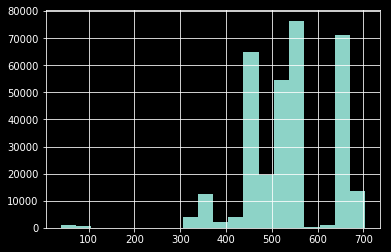

In [46]:
plt.style.use('dark_background')
demogra["income"].hist(bins=20)

# Click vs カテゴリ（df_train）

In [47]:
# click vs bannerPosition
cross_1 = pd.crosstab(df_train["bannerPosition"], df_train["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_1 = pd.DataFrame(cross_1[1]/(cross_1[0] + cross_1[1]))

In [48]:
cross_1

isClick,0,1
bannerPosition,,
6,1348507,651118
5,1889379,511554
3,1221176,377250
4,1236110,365862
2,916735,282695
1,934689,264925


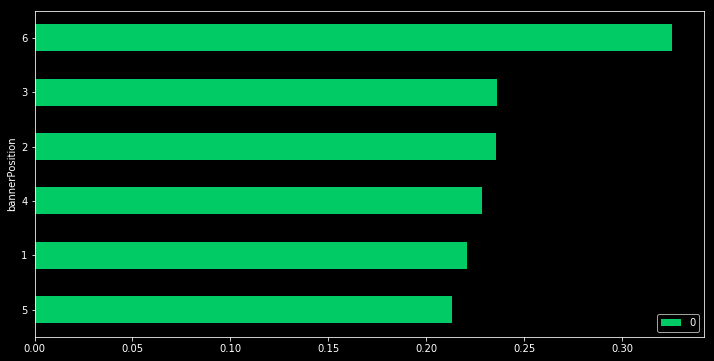

In [49]:
click_rate_rank_1.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(12,6), color="springgreen")

6:"Full Screen"はよくクリックされることがわかる。 

In [50]:
# click vs bannerSize
cross_2 = pd.crosstab(df_train["bannerSize"], df_train["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_2 = pd.DataFrame(cross_2[1]/(cross_2[0] + cross_2[1]))

In [51]:
cross_2

isClick,0,1
bannerSize,,
1,3524002,975916
3,2283472,716288
4,1348507,651118
2,390615,110082


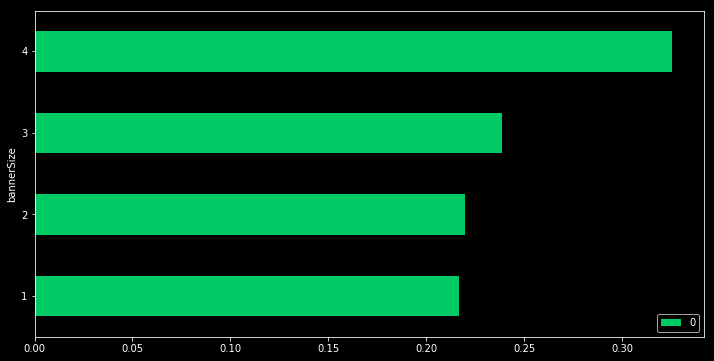

In [52]:
click_rate_rank_2.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(12,6), color="springgreen")

バナーがデカければデカイほどよくクリックされることがわかる。 

In [53]:
# click vs mediaId	
cross_3 = pd.crosstab(df_train["mediaId"], df_train["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_3 = pd.DataFrame(cross_3[1]/(cross_3[0] + cross_3[1]))

In [54]:
cross_3

isClick,0,1
mediaId,,
806,6911,3176
394,6977,3147
95,6947,3120
784,7012,3088
745,7117,3068
19,7104,3063
64,6980,3055
167,7061,3053
176,7000,3040


In [55]:
click_rate_rank_3.sort_values(by=0,ascending=False)

,0
mediaId,
806,0.314861
394,0.310846
95,0.309924
149,0.306041
784,0.305743
64,0.304434
122,0.303256
184,0.303151
176,0.302789


メディアごとにクリックされる度に違いが出るのがわかる。

In [56]:
# click vs osType
cross_4 = pd.crosstab(df_train["osType"], df_train["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_4 = pd.DataFrame(cross_4[1]/(cross_4[0] + cross_4[1]))

In [57]:
cross_4

isClick,0,1
osType,,
iOS,4881579,1619267
ANDROID,2665017,834137


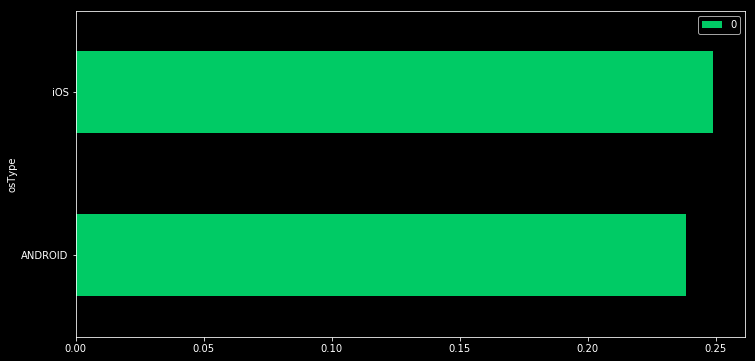

In [58]:
click_rate_rank_4.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(12,6), color="springgreen")

osのタイプはクリックにあんま関係なさそう。 

In [59]:
# click vs advId
cross_5 = pd.crosstab(df_train["advId"], df_train["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_5 = pd.DataFrame(cross_5[1]/(cross_5[0] + cross_5[1]))

In [60]:
cross_5

isClick,0,1
advId,,
18,336466,163311
6,341661,158778
12,342946,157980
11,357445,142801
2,356414,142409
3,361577,138268
16,362584,137328
20,368535,133010
14,367565,132435


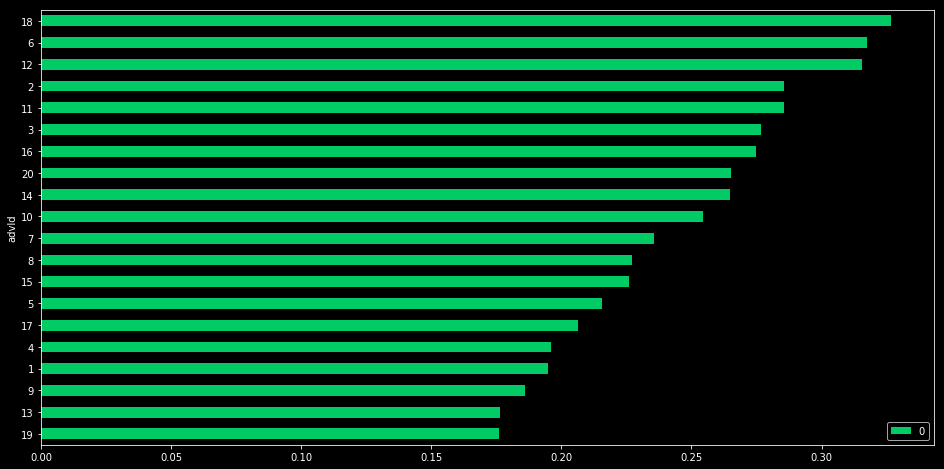

In [61]:
click_rate_rank_5.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(16,8), color="springgreen")

広告主によってまあまあクリックされ度が異なることがわかる。 

あとclick vs timestampが見れてないからあとで 

# target 

(array([7546596.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 2453404.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

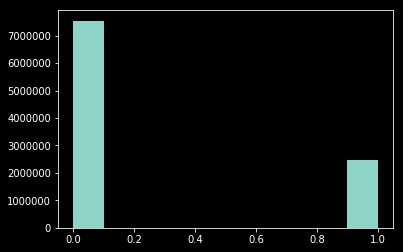

In [62]:
plt.style.use('dark_background')
plt.hist(df_train["isClick"])

In [63]:
print("非クリック・クリック比:",len(df_train[df_train["isClick"]==1])/len(df_train[df_train["isClick"]==0]))

非クリック・クリック比: 0.3251007474098256


アンダーサンプリング・オーバーサンプリング等はいらなそう！ 

# test model 

サーバーサイドとの検証用にとりあえずめっちゃ雑なモデルを作っておく 

In [64]:
# objectをlabel-encode
#from sklearn.preprocessing import LabelEncoder

#list_target = list(df_train.drop(["bannerPosition","bannerSize","deviceType",
#                                  "floorPrice","mediaId","timestamp","advId",
#                                  "isClick"],axis=1).columns)
#for target in list_target:
#    le = LabelEncoder()
#    le.fit(df_train[target])
#    df_train[target] = le.transform(df_train[target])

In [65]:
#df_train.head()

In [66]:
#X_train = df_train.drop(["id","isClick"],axis=1).values
#y_train = df_train["advId"].values

In [67]:
# ランダムフォレスト
#from sklearn.ensemble import RandomForestClassifier
#rfc = RandomForestClassifier(random_state=0, n_estimators=10)
#rfc.fit(X_train, y_train)

In [68]:
# 訓練精度
#print('train acc: %.3f' % rfc.score(X_train, y_train))

In [69]:
# confusion matrix
#from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_train, rfc.predict(X_train))

In [70]:
#def plot_cm(confmat):
#    fig, ax = plt.subplots(figsize=(5, 5))
#    ax.matshow(confmat, cmap=plt.cm.RdYlGn, alpha=10)
#    for i in range(confmat.shape[0]):
#        for j in range(confmat.shape[1]):
#            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
#    plt.title('predicted label')
#    plt.ylabel('true label')
#    plt.tight_layout() 
#    plt.show()

In [71]:
#plot_cm(cm)

# preprocess 

## df_train（岸田担当）

・ToDo:

①"bannerPosition"をone-hot-encoding。

②"deviceType"をone-hot-encoding。

③"mediaId"を（少ないカテゴリをothersにまとめて）one-hot-encodingやcount-encodingなどに変換。

④"osType"をone-hot-encoding。

⑤"timestamp"を時間帯で区分して（午前・午後・深夜等）one-hot-encoding?

⑥"advId"をone-hot-encoding。

⑦"bannerSize"をone-hot-encoding。

In [72]:
#①"bannerPosition"をone-hot-encoding。

In [73]:
df_train["bannerPosition"] = df_train["bannerPosition"].astype("str")

In [74]:
df_train["bannerPosition"].value_counts()

5    2400933
6    1999625
4    1601972
3    1598426
1    1199614
2    1199430
Name: bannerPosition, dtype: int64

In [75]:
banner_posi_dummies = pd.get_dummies(df_train["bannerPosition"])

In [76]:
banner_posi_dummies = banner_posi_dummies.drop(["1"],axis=1) # 多重共線性を避けるためにカラムを１つdrop
banner_posi_dummies = banner_posi_dummies.rename(columns={"2":"bannerPosition_below","3":"bannerPosition_header","4":"bannerPosition_footer",
                                    "5":"bannerPosition_Sidebar","6":"bannerPosition_Full"})

In [77]:
banner_posi_dummies.head()

,bannerPosition_below,bannerPosition_header,bannerPosition_footer,bannerPosition_Sidebar,bannerPosition_Full
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,0,0


In [78]:
#②"deviceType"をone-hot-encoding。

In [79]:
df_train["deviceType"].value_counts()

1    10000000
Name: deviceType, dtype: int64

まさかの全部Mobile→"deviceType"は変数からはずす

In [80]:
#③"mediaId"を（少ないカテゴリをothersにまとめて）one-hot-encodingやcount-encodingなどに変換。

"mediaId" : 「出現回数」と「出現したうちクリックされたレコード数」でカテゴリを置換

In [81]:
#df_train["mediaId"] = df_train["mediaId"].astype("str")

In [82]:
df_train.head(3)

,deviceId,bannerPosition,bannerSize,deviceType,floorPrice,id,mediaId,osType,timestamp,advId,isClick
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,6,4,1,19392.00,8abefa99-20b6-45ea-8e5b-c74081fb1fb1,608,iOS,1535203765,11,0
1,57525600-3f29-4ff9-b236-ea32fc43d78c,5,1,1,6758.20,f1e449fd-16c7-48a0-87ce-ce7f6cb1bf58,176,iOS,1535135105,6,1
2,18221f19-865b-4923-a5a9-ea13239d3aad,5,1,1,8816.15,cbe73705-bb9d-453c-b191-e1e243347beb,281,iOS,1534845969,1,0


In [83]:
# 出現回数
mediaId_counts = pd.DataFrame(df_train["mediaId"].value_counts())
mediaId_counts.columns = ["mediaId_counts"]
mediaId_counts

,mediaId_counts
607,10304
258,10301
762,10286
332,10272
367,10270
844,10264
970,10246
651,10244
211,10243
734,10241


In [84]:
mediaId_counts["mediaId"] = list(mediaId_counts.index)
mediaId_counts

,mediaId_counts,mediaId
607,10304,607
258,10301,258
762,10286,762
332,10272,332
367,10270,367
844,10264,844
970,10246,970
651,10244,651
211,10243,211
734,10241,734


In [85]:
mediaId_counts_dict = mediaId_counts.to_dict()

In [86]:
# 出現したうちクリックされたレコード数
# click vs mediaId
cross_6 = pd.crosstab(df_train["mediaId"], df_train["isClick"]).drop([0],axis=1).sort_values(by=1,ascending=False)
cross_6.columns = ["Click_counts_mediaId"]
cross_6

,Click_counts_mediaId
mediaId,
806,3176
394,3147
95,3120
784,3088
745,3068
19,3063
64,3055
167,3053
176,3040


In [87]:
cross_6["mediaId"] = list(cross_6.index)
cross_6

,Click_counts_mediaId,mediaId
mediaId,,
806,3176,806
394,3147,394
95,3120,95
784,3088,784
745,3068,745
19,3063,19
64,3055,64
167,3053,167
176,3040,176


In [88]:
Click_counts_mediaId_dict = cross_6.to_dict()

In [89]:
#mediaId_dummies = pd.get_dummies(df_train["mediaId"])

In [90]:
#mediaId_columns = []
#for i in list(mediaId_dummies.columns):
#    new_col = "mediaId_" + str(i)
#    mediaId_columns.append(new_col)

In [91]:
#mediaId_dummies.columns = mediaId_columns

In [92]:
#mediaId_dummies = mediaId_dummies.drop(["mediaId_0"],axis=1) # 多重共線性を避けるためにカラムを１つdrop

In [93]:
#mediaId_dummies.head()

In [94]:
#④"osType"をone-hot-encoding。

In [95]:
df_train["osType"].value_counts()

iOS        6500846
ANDROID    3499154
Name: osType, dtype: int64

In [96]:
os_type_dummies = pd.get_dummies(df_train["osType"])
os_type_dummies = os_type_dummies.drop(["ANDROID"],axis=1)
os_type_dummies = os_type_dummies.rename(columns={"iOS":"os_type_iOS"})

In [97]:
os_type_dummies.head()

,os_type_iOS
0,1
1,1
2,1
3,0
4,1


In [98]:
#⑤"timestamp"から時・曜日を抽出してそれぞれ変数として持たせる

In [99]:
import datetime
list_timestamp_int = list(df_train["timestamp"])

#"timestamp":int to timestamp
list_timestamp = []
for i in range(len(list_timestamp_int)):
    list_timestamp.append(datetime.datetime.fromtimestamp(list_timestamp_int[i]))

In [100]:
list_timestamp

[datetime.datetime(2018, 8, 25, 22, 29, 25),
 datetime.datetime(2018, 8, 25, 3, 25, 5),
 datetime.datetime(2018, 8, 21, 19, 6, 9),
 datetime.datetime(2018, 8, 22, 18, 44, 52),
 datetime.datetime(2018, 8, 25, 1, 58, 49),
 datetime.datetime(2018, 8, 22, 15, 23),
 datetime.datetime(2018, 8, 25, 14, 39, 4),
 datetime.datetime(2018, 8, 21, 4, 8, 44),
 datetime.datetime(2018, 8, 24, 17, 4, 23),
 datetime.datetime(2018, 8, 24, 8, 30, 39),
 datetime.datetime(2018, 8, 22, 7, 0, 42),
 datetime.datetime(2018, 8, 25, 3, 13, 44),
 datetime.datetime(2018, 8, 27, 17, 49, 1),
 datetime.datetime(2018, 8, 27, 17, 26, 53),
 datetime.datetime(2018, 8, 22, 12, 2, 49),
 datetime.datetime(2018, 8, 25, 4, 35, 12),
 datetime.datetime(2018, 8, 21, 10, 13, 19),
 datetime.datetime(2018, 8, 23, 3, 15, 14),
 datetime.datetime(2018, 8, 21, 6, 32, 26),
 datetime.datetime(2018, 8, 26, 11, 36, 29),
 datetime.datetime(2018, 8, 26, 9, 34, 19),
 datetime.datetime(2018, 8, 21, 4, 25, 8),
 datetime.datetime(2018, 8, 23, 9, 

In [101]:
# 時・曜日を抽出
list_hour = []
list_weekday = []# 0~4:月~金。5~6:土~日
for i in range(len(list_timestamp)):
    list_hour.append(list_timestamp[i].hour)
    list_weekday.append(list_timestamp[i].weekday())

In [102]:
df_train["hour"] = list_hour
df_train["weekday"] = list_weekday

In [103]:
df_train.head(3)

,deviceId,bannerPosition,bannerSize,deviceType,floorPrice,id,mediaId,osType,timestamp,advId,isClick,hour,weekday
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,6,4,1,19392.00,8abefa99-20b6-45ea-8e5b-c74081fb1fb1,608,iOS,1535203765,11,0,22,5
1,57525600-3f29-4ff9-b236-ea32fc43d78c,5,1,1,6758.20,f1e449fd-16c7-48a0-87ce-ce7f6cb1bf58,176,iOS,1535135105,6,1,3,5
2,18221f19-865b-4923-a5a9-ea13239d3aad,5,1,1,8816.15,cbe73705-bb9d-453c-b191-e1e243347beb,281,iOS,1534845969,1,0,19,1


# （Click vs カテゴリ）（df_train）

In [104]:
# click vs hour
cross_7 = pd.crosstab(df_train["hour"], df_train["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_7 = pd.DataFrame(cross_7[1]/(cross_7[0] + cross_7[1]))

In [105]:
cross_7

isClick,0,1
hour,,
5,304738,111830
0,305765,111659
11,306528,110887
13,306028,110576
1,306039,110509
17,306943,110034
19,309159,107659
12,310750,105811
4,312298,104527


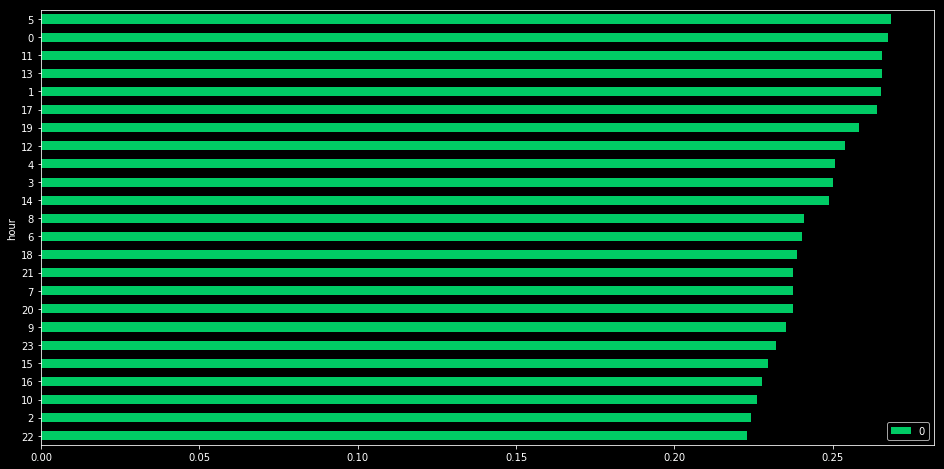

In [106]:
click_rate_rank_7.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(16,8), color="springgreen")

In [107]:
# click vs weekday
cross_8 = pd.crosstab(df_train["weekday"], df_train["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_8 = pd.DataFrame(cross_8[1]/(cross_8[0] + cross_8[1]))

In [108]:
cross_8

isClick,0,1
weekday,,
2,1068956,360976
6,1070443,358461
1,1069472,357995
0,1069989,357575
3,1085120,343184
4,1086474,342242
5,1096142,332971


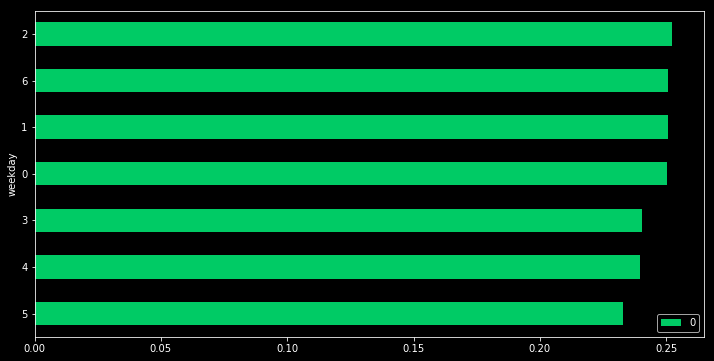

In [109]:
click_rate_rank_8.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(12,6), color="springgreen")

hourもweekdayもあんまクリックに関係なさそう。 

# preprocess（再開） 

In [110]:
df_train["hour"].value_counts()

7     417467
0     417424
11    417415
18    417353
23    417167
6     417133
17    416977
4     416825
19    416818
21    416775
22    416719
14    416688
13    416604
2     416601
5     416568
12    416561
1     416548
15    416538
10    416462
9     416199
20    416140
8     415731
16    415663
3     415624
Name: hour, dtype: int64

In [111]:
df_train["hour"] = df_train["hour"].astype("str")

In [112]:
hour_dummies = pd.get_dummies(df_train["hour"])

In [113]:
hour_columns = []
for i in list(hour_dummies.columns):
    new_col = "h_" + str(i)
    hour_columns.append(new_col)

In [114]:
hour_dummies.columns = hour_columns

In [115]:
hour_dummies = hour_dummies.drop(["h_0"],axis=1)

In [116]:
hour_dummies.head()

,h_1,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_2,h_20,h_21,h_22,h_23,h_3,h_4,h_5,h_6,h_7,h_8,h_9
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [117]:
hour_dummies_dict = hour_dummies.to_dict()

In [118]:
# 休日フラグ
weekday_mapping = {0:0,1:0,2:0,3:0,4:0,5:1,6:1}
df_train["weekday"] = df_train["weekday"].map(weekday_mapping)
df_train = df_train.rename(columns={"weekday":"isHoliday"})

In [119]:
df_train.head()

,deviceId,bannerPosition,bannerSize,deviceType,floorPrice,id,mediaId,osType,timestamp,advId,isClick,hour,isHoliday
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,6,4,1,19392.00,8abefa99-20b6-45ea-8e5b-c74081fb1fb1,608,iOS,1535203765,11,0,22,1
1,57525600-3f29-4ff9-b236-ea32fc43d78c,5,1,1,6758.20,f1e449fd-16c7-48a0-87ce-ce7f6cb1bf58,176,iOS,1535135105,6,1,3,1
2,18221f19-865b-4923-a5a9-ea13239d3aad,5,1,1,8816.15,cbe73705-bb9d-453c-b191-e1e243347beb,281,iOS,1534845969,1,0,19,0
3,68a69f8a-a3d6-467a-832a-04f626737a81,5,3,1,9572.60,e770ef71-54a3-40be-8361-65a6128dac0e,22,ANDROID,1534931092,2,1,18,0
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,1,1,1,9793.30,923f1982-947c-4e81-9d43-b31d20c4579f,869,iOS,1535129929,15,0,1,1


一応"isHoliday"のクリッククロス集計を確認する↓ 

In [120]:
# click vs isHoliday
cross_9 = pd.crosstab(df_train["isHoliday"], df_train["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_9 = pd.DataFrame(cross_9[1]/(cross_9[0] + cross_9[1]))

In [121]:
cross_9

isClick,0,1
isHoliday,,
0,5380011,1761972
1,2166585,691432


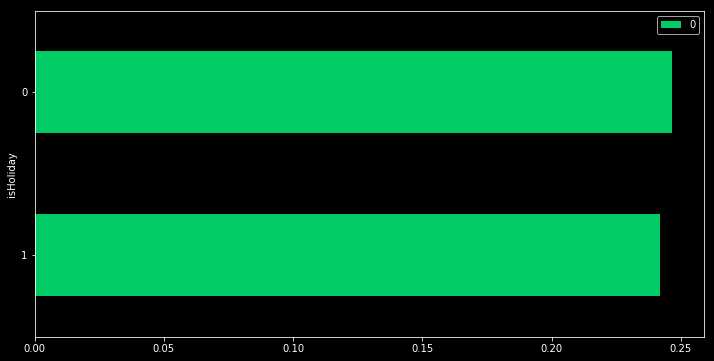

In [122]:
click_rate_rank_9.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(12,6), color="springgreen")

一致しすぎて悲しい。 

In [123]:
#⑥"advId"をone-hot-encoding。

In [124]:
df_train["advId"] = df_train["advId"].astype("str")

In [125]:
df_train["advId"].value_counts()

20    501545
12    500926
13    500673
6     500439
17    500407
11    500246
15    500245
8     500221
14    500000
7     499916
16    499912
3     499845
9     499822
18    499777
4     499754
1     499714
10    499448
5     499247
19    499040
2     498823
Name: advId, dtype: int64

In [126]:
ad_id_dummies = pd.get_dummies(df_train["advId"])

In [127]:
ad_id_columns = []
for i in list(ad_id_dummies.columns):
    new_col = "advId_" + str(i)
    ad_id_columns.append(new_col)

In [128]:
ad_id_dummies.columns = ad_id_columns

In [129]:
ad_id_dummies = ad_id_dummies.drop(["advId_1"],axis=1)

In [130]:
ad_id_dummies.head()

,advId_10,advId_11,advId_12,advId_13,advId_14,advId_15,advId_16,advId_17,advId_18,advId_19,advId_2,advId_20,advId_3,advId_4,advId_5,advId_6,advId_7,advId_8,advId_9
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
#⑦："bannerSize"をone-hot-encoding。
df_train["bannerSize"] = df_train["bannerSize"].astype("str")

In [132]:
df_train["bannerSize"].value_counts()

1    4499918
3    2999760
4    1999625
2     500697
Name: bannerSize, dtype: int64

In [133]:
bannerSize_dummies = pd.get_dummies(df_train["bannerSize"])

In [134]:
bannerSize_columns = []
for i in list(bannerSize_dummies.columns):
    new_col = "bannerSize_" + str(i)
    bannerSize_columns.append(new_col)

In [135]:
bannerSize_dummies.columns = bannerSize_columns

In [136]:
bannerSize_dummies = bannerSize_dummies.drop(["bannerSize_1"],axis=1)

In [137]:
bannerSize_dummies.head()

,bannerSize_2,bannerSize_3,bannerSize_4
0,0,0,1
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0


・作った変数：df_train

・banner_posi_dummies

・mediaId_dummies -> 次元デカイから"mediaId_counts","Click_counts_mediaId"にした。

・os_type_dummies

・hour_dummies

・isHoliday（既にmerge済）

・ad_id_dummies

・bannerSize_dummies

df_trainで元の変数たちをdropして上の変数たちをmerge。

In [138]:
df_train.head(3)

,deviceId,bannerPosition,bannerSize,deviceType,floorPrice,id,mediaId,osType,timestamp,advId,isClick,hour,isHoliday
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,6,4,1,19392.00,8abefa99-20b6-45ea-8e5b-c74081fb1fb1,608,iOS,1535203765,11,0,22,1
1,57525600-3f29-4ff9-b236-ea32fc43d78c,5,1,1,6758.20,f1e449fd-16c7-48a0-87ce-ce7f6cb1bf58,176,iOS,1535135105,6,1,3,1
2,18221f19-865b-4923-a5a9-ea13239d3aad,5,1,1,8816.15,cbe73705-bb9d-453c-b191-e1e243347beb,281,iOS,1534845969,1,0,19,0


In [139]:
df_train = df_train.drop(["bannerPosition","deviceType","id","osType",
                         "timestamp","advId","hour","bannerSize"],axis=1)

In [140]:
df_train = pd.concat([df_train,banner_posi_dummies],axis=1)

In [141]:
#df_train = pd.concat([df_train,mediaId_dummies],axis=1)

In [142]:
df_train = pd.concat([df_train,os_type_dummies],axis=1)

In [143]:
df_train = pd.concat([df_train,hour_dummies],axis=1)

In [144]:
df_train = pd.concat([df_train,ad_id_dummies],axis=1)

In [145]:
df_train = pd.merge(df_train,mediaId_counts,on="mediaId",how="left")

In [146]:
df_train = pd.merge(df_train,cross_6,on="mediaId",how="left")

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: FutureWarning: 'mediaId' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


In [147]:
df_train = pd.concat([df_train,bannerSize_dummies],axis=1)

In [148]:
df_train = df_train.drop(["mediaId"],axis=1)

In [149]:
df_train.head(3)

,deviceId,floorPrice,isClick,isHoliday,bannerPosition_below,bannerPosition_header,bannerPosition_footer,bannerPosition_Sidebar,bannerPosition_Full,os_type_iOS,h_1,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_2,h_20,h_21,h_22,h_23,h_3,h_4,h_5,h_6,h_7,h_8,h_9,advId_10,advId_11,advId_12,advId_13,advId_14,advId_15,advId_16,advId_17,advId_18,advId_19,advId_2,advId_20,advId_3,advId_4,advId_5,advId_6,advId_7,advId_8,advId_9,mediaId_counts,Click_counts_mediaId,bannerSize_2,bannerSize_3,bannerSize_4
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,19392.00,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10106,2841,0,0,1
1,57525600-3f29-4ff9-b236-ea32fc43d78c,6758.20,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10040,3040,0,0,0
2,18221f19-865b-4923-a5a9-ea13239d3aad,8816.15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10006,2582,0,0,0


In [150]:
df_train.dtypes

deviceId                   object
floorPrice                float64
isClick                     int64
isHoliday                   int64
bannerPosition_below        uint8
bannerPosition_header       uint8
bannerPosition_footer       uint8
bannerPosition_Sidebar      uint8
bannerPosition_Full         uint8
os_type_iOS                 uint8
h_1                         uint8
h_10                        uint8
h_11                        uint8
h_12                        uint8
h_13                        uint8
h_14                        uint8
h_15                        uint8
h_16                        uint8
h_17                        uint8
h_18                        uint8
h_19                        uint8
h_2                         uint8
h_20                        uint8
h_21                        uint8
h_22                        uint8
h_23                        uint8
h_3                         uint8
h_4                         uint8
h_5                         uint8
h_6           

In [151]:
# csvに吐き出す
#df_train.to_csv("train_cleaned.csv")

## demogra（日光くん担当）

・ToDo:

①"age"を平均値補完。

②"gender"をone-hot-encoding。

③"hasChild"をone-hot-encoding。

④"income"を平均値補完。

⑤"isMarried"をone-hot-encoding。

In [155]:
# read csv file
demogra_cleaned = pd.read_csv("../../data/demogra_cleaned.csv")

In [156]:
demogra_cleaned = demogra_cleaned.drop(["Unnamed: 0"],axis=1)
demogra_cleaned.head()

,deviceId,age,income,female,male,not_married,married,no,yes
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,36.0,458.00000,1,0,0,1,0,1
1,57525600-3f29-4ff9-b236-ea32fc43d78c,52.0,678.00000,1,0,1,0,1,0
2,18221f19-865b-4923-a5a9-ea13239d3aad,40.0,537.12563,1,0,0,0,1,0
3,68a69f8a-a3d6-467a-832a-04f626737a81,42.0,536.00000,0,0,0,1,0,0
4,8b0cde1a-b024-43cf-a218-40b7abab7bde,38.0,537.12563,1,0,0,0,0,0


In [157]:
demogra_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
age,500000.0,45.500342,9.377507,15.0,40.0,45.500342,51.0,79.0
income,500000.0,537.125630,75.535335,39.0,526.0,537.125630,545.0,704.0
female,500000.0,0.523286,0.499458,0.0,0.0,1.000000,1.0,1.0
male,500000.0,0.347296,0.476111,0.0,0.0,0.000000,1.0,1.0
not_married,500000.0,0.278604,0.448313,0.0,0.0,0.000000,1.0,1.0
married,500000.0,0.471654,0.499196,0.0,0.0,0.000000,1.0,1.0
no,500000.0,0.357506,0.479266,0.0,0.0,0.000000,1.0,1.0
yes,500000.0,0.191676,0.393620,0.0,0.0,0.000000,0.0,1.0


In [158]:
print("------- demogra_cleaned --------")
print("")  
print("data type:\n",demogra_cleaned.dtypes)
print("")
print("number of null:\n",demogra_cleaned.isnull().sum())
print("")
print("data length:\n",len(demogra_cleaned))
print("")
print("u_unique:\n",demogra_cleaned.nunique())

------- demogra_cleaned --------

data type:
 deviceId        object
age            float64
income         float64
female           int64
male             int64
not_married      int64
married          int64
no               int64
yes              int64
dtype: object

number of null:
 deviceId       0
age            0
income         0
female         0
male           0
not_married    0
married        0
no             0
yes            0
dtype: int64

data length:
 500000

u_unique:
 deviceId       500000
age                66
income            420
female              2
male                2
not_married         2
married             2
no                  2
yes                 2
dtype: int64


## merge 

・ToDo:

①前処理後のdf_trainとdemograをdeviceIdをキーにしてmerge。

②標準化する。 

In [159]:
df_train.head(2)

,deviceId,floorPrice,isClick,isHoliday,bannerPosition_below,bannerPosition_header,bannerPosition_footer,bannerPosition_Sidebar,bannerPosition_Full,os_type_iOS,h_1,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_2,h_20,h_21,h_22,h_23,h_3,h_4,h_5,h_6,h_7,h_8,h_9,advId_10,advId_11,advId_12,advId_13,advId_14,advId_15,advId_16,advId_17,advId_18,advId_19,advId_2,advId_20,advId_3,advId_4,advId_5,advId_6,advId_7,advId_8,advId_9,mediaId_counts,Click_counts_mediaId,bannerSize_2,bannerSize_3,bannerSize_4
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,19392.0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10106,2841,0,0,1
1,57525600-3f29-4ff9-b236-ea32fc43d78c,6758.2,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10040,3040,0,0,0


In [160]:
demogra_cleaned.head(2)

,deviceId,age,income,female,male,not_married,married,no,yes
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,36.0,458.0,1,0,0,1,0,1
1,57525600-3f29-4ff9-b236-ea32fc43d78c,52.0,678.0,1,0,1,0,1,0


In [161]:
df_final = pd.merge(df_train,demogra_cleaned,on="deviceId",how="left")
df_final.head(3)

,deviceId,floorPrice,isClick,isHoliday,bannerPosition_below,bannerPosition_header,bannerPosition_footer,bannerPosition_Sidebar,bannerPosition_Full,os_type_iOS,h_1,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_2,h_20,h_21,h_22,h_23,h_3,h_4,h_5,h_6,h_7,h_8,h_9,advId_10,advId_11,advId_12,advId_13,advId_14,advId_15,advId_16,advId_17,advId_18,advId_19,advId_2,advId_20,advId_3,advId_4,advId_5,advId_6,advId_7,advId_8,advId_9,mediaId_counts,Click_counts_mediaId,bannerSize_2,bannerSize_3,bannerSize_4,age,income,female,male,not_married,married,no,yes
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,19392.00,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10106,2841,0,0,1,36.0,458.00000,1,0,0,1,0,1
1,57525600-3f29-4ff9-b236-ea32fc43d78c,6758.20,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10040,3040,0,0,0,52.0,678.00000,1,0,1,0,1,0
2,18221f19-865b-4923-a5a9-ea13239d3aad,8816.15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10006,2582,0,0,0,40.0,537.12563,1,0,0,0,1,0


# （Click vs カテゴリ）（demogra）

In [162]:
# click vs age
cross_10 = pd.crosstab(df_final["age"], df_final["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_10 = pd.DataFrame(cross_10[1]/(cross_10[0] + cross_10[1]))

In [163]:
cross_10

isClick,0,1
age,,
45.500342,904577,294123
47.000000,263026,88354
46.000000,260857,87643
45.000000,259880,86900
44.000000,258435,86605
43.000000,256886,86014
48.000000,252510,85030
49.000000,251279,84121
42.000000,246632,83228


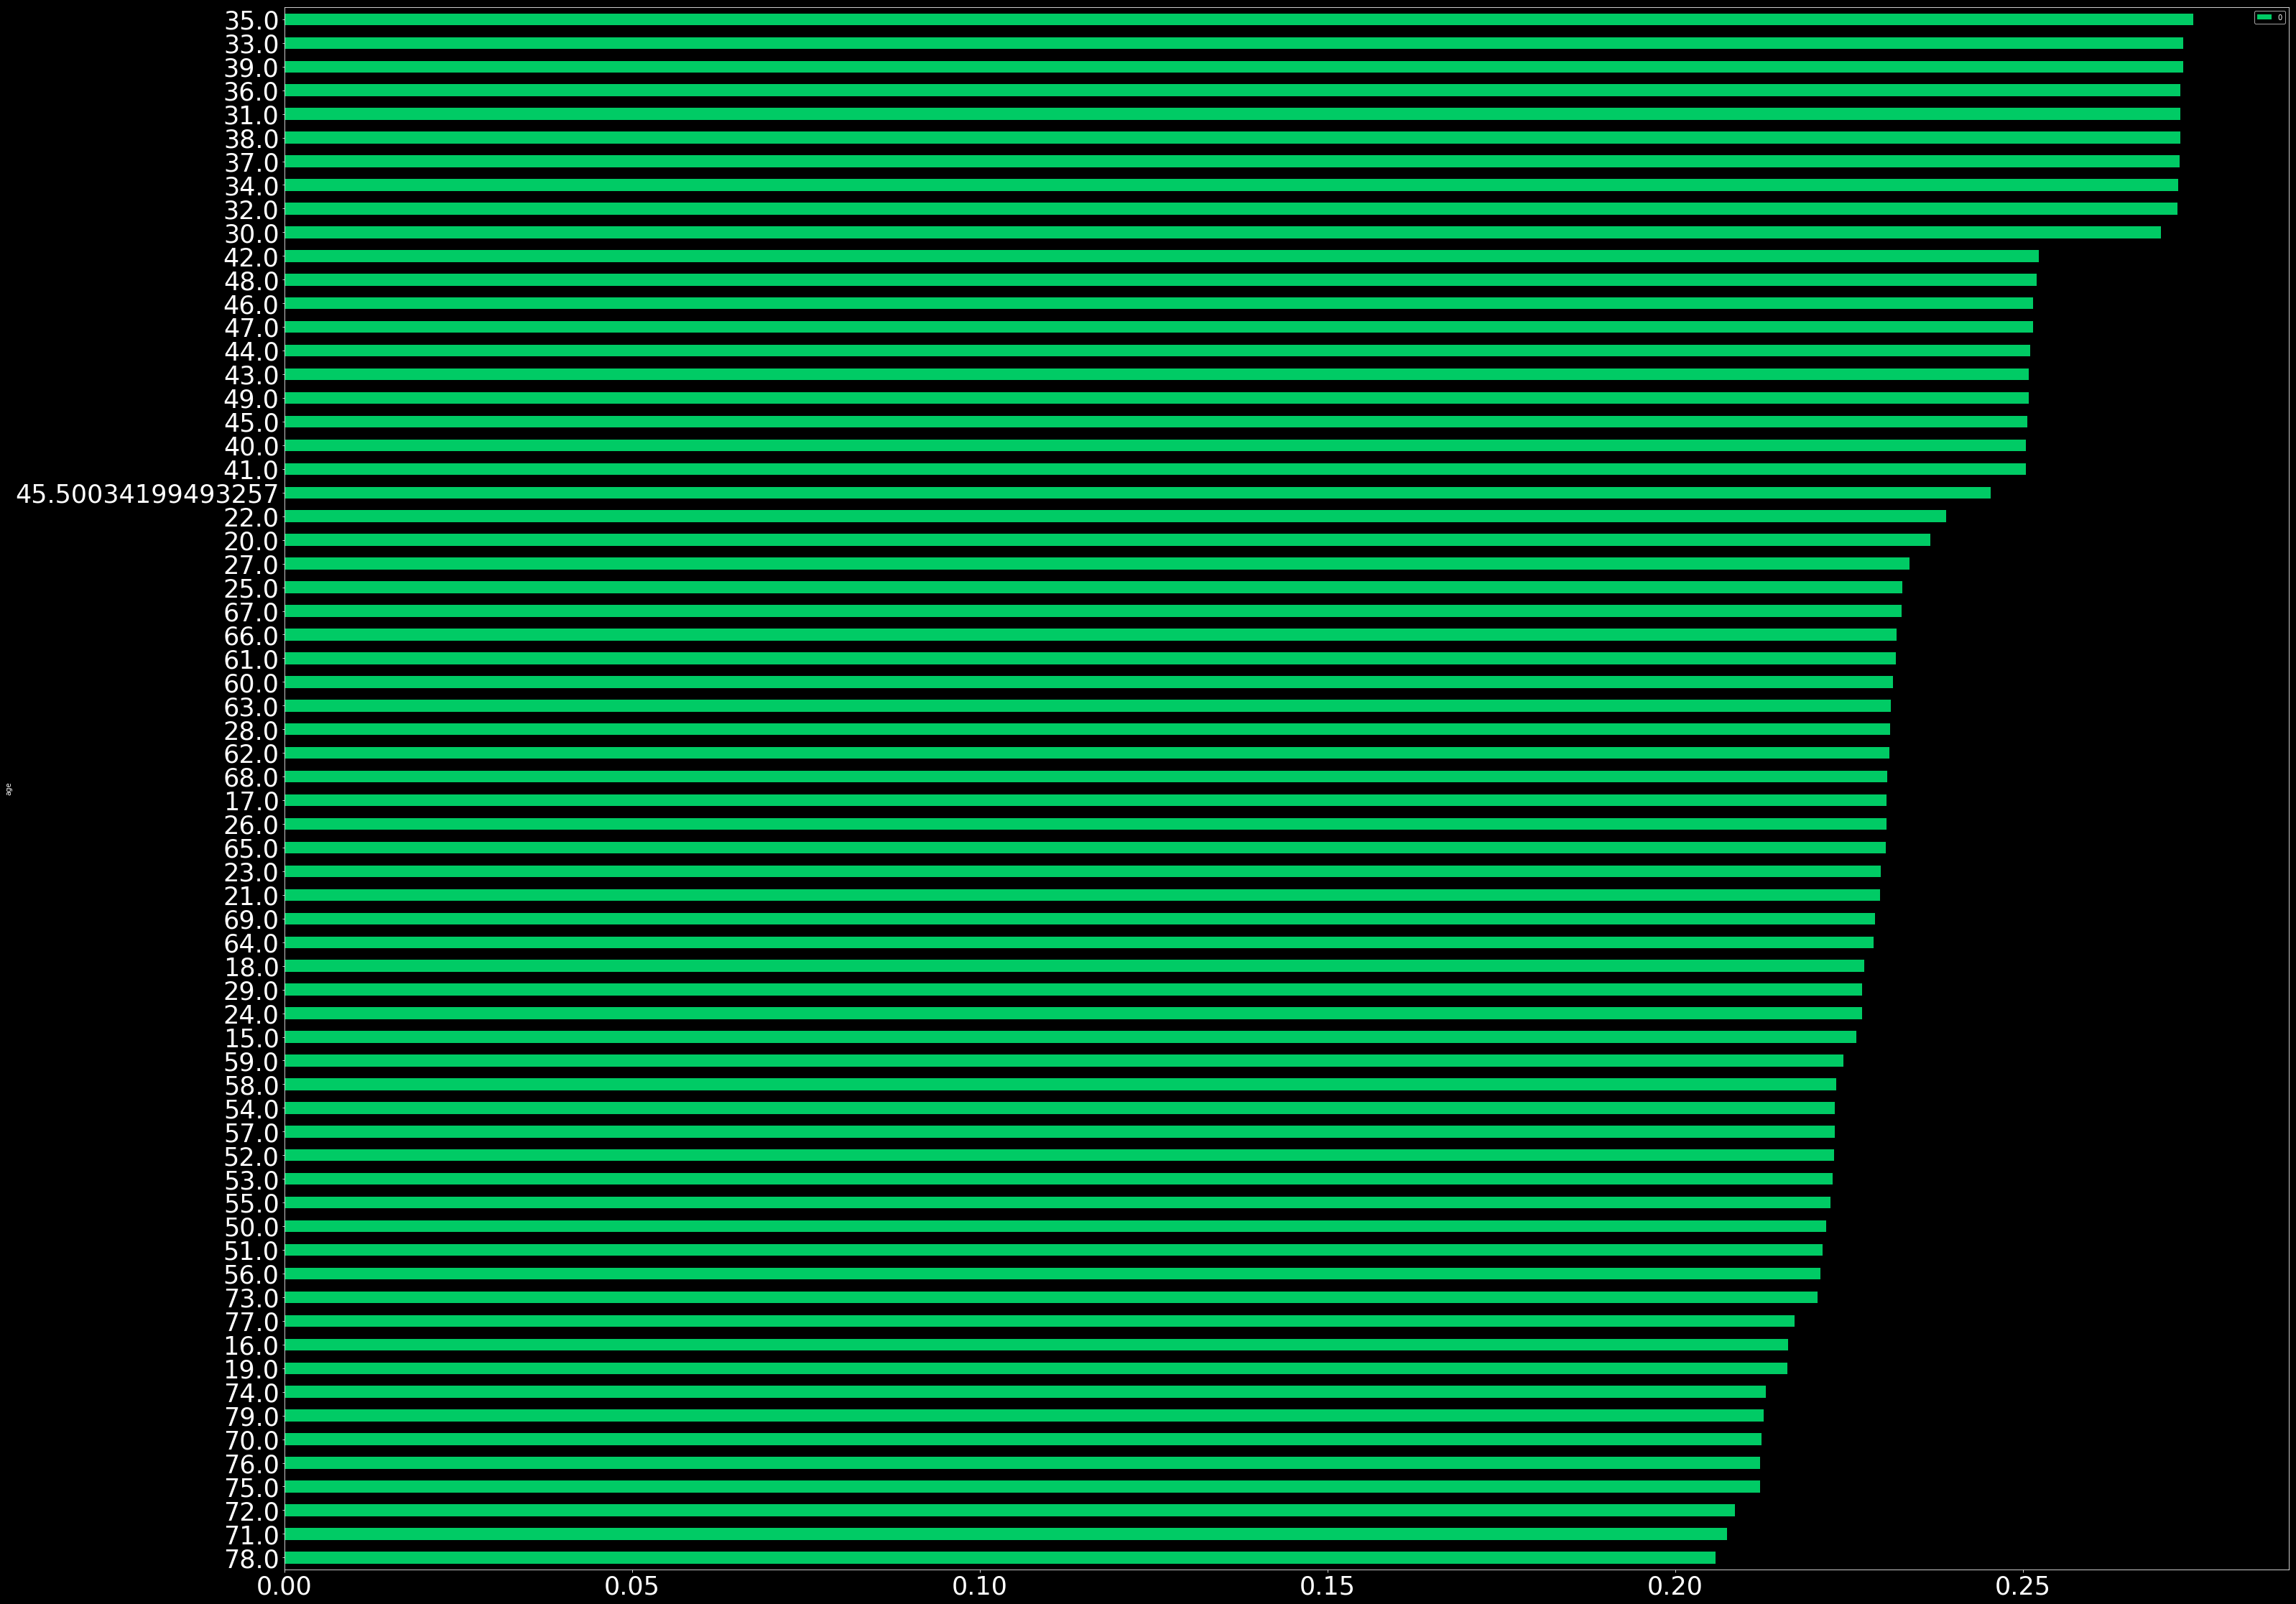

In [164]:
click_rate_rank_10.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(50,40), color="springgreen",fontsize=35)

年齢はある程度クリックに関係ありそう。 

In [165]:
# click vs female
cross_11 = pd.crosstab(df_final["female"], df_final["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_11 = pd.DataFrame(cross_11[1]/(cross_11[0] + cross_11[1]))

In [166]:
cross_11

isClick,0,1
female,,
1,3943949,1288911
0,3602647,1164493


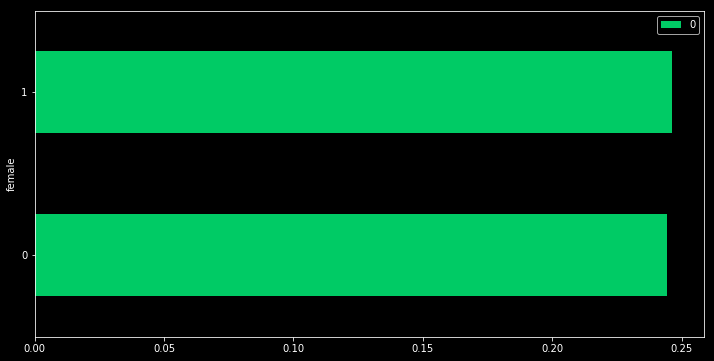

In [167]:
click_rate_rank_11.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(12,6), color="springgreen")

性別クリックに関係なさそう。


In [168]:
# click vs married
cross_12 = pd.crosstab(df_final["married"], df_final["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_12 = pd.DataFrame(cross_12[1]/(cross_12[0] + cross_12[1]))

In [169]:
cross_12

isClick,0,1
married,,
0,3959766,1323694
1,3586830,1129710


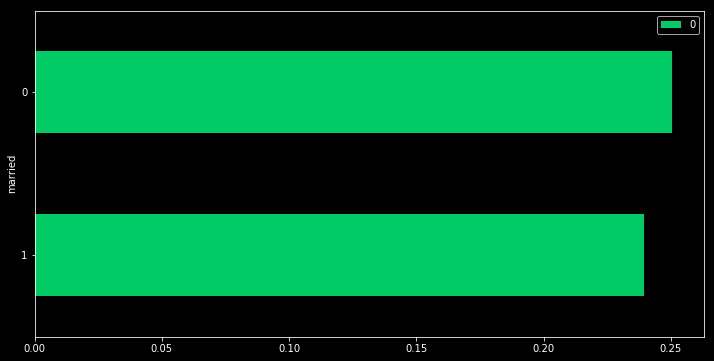

In [170]:
click_rate_rank_12.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(12,6), color="springgreen")

結婚の有無はクリックにほぼ関係なさそう。 

In [171]:
# click vs yes(hasChild)
cross_13 = pd.crosstab(df_final["yes"], df_final["isClick"]).sort_values(by=1,ascending=False)
click_rate_rank_13 = pd.DataFrame(cross_13[1]/(cross_13[0] + cross_13[1]))

In [172]:
cross_13

isClick,0,1
yes,,
0,6100379,1982861
1,1446217,470543


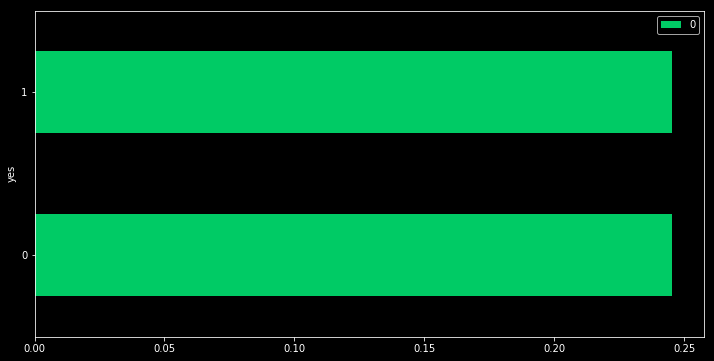

In [173]:
click_rate_rank_13.sort_values(by=0,ascending=True).plot.barh(alpha=0.8,figsize=(12,6), color="springgreen")

子供の有無もクリックにはほぼ関係なさそう。 

# df_final.corr()

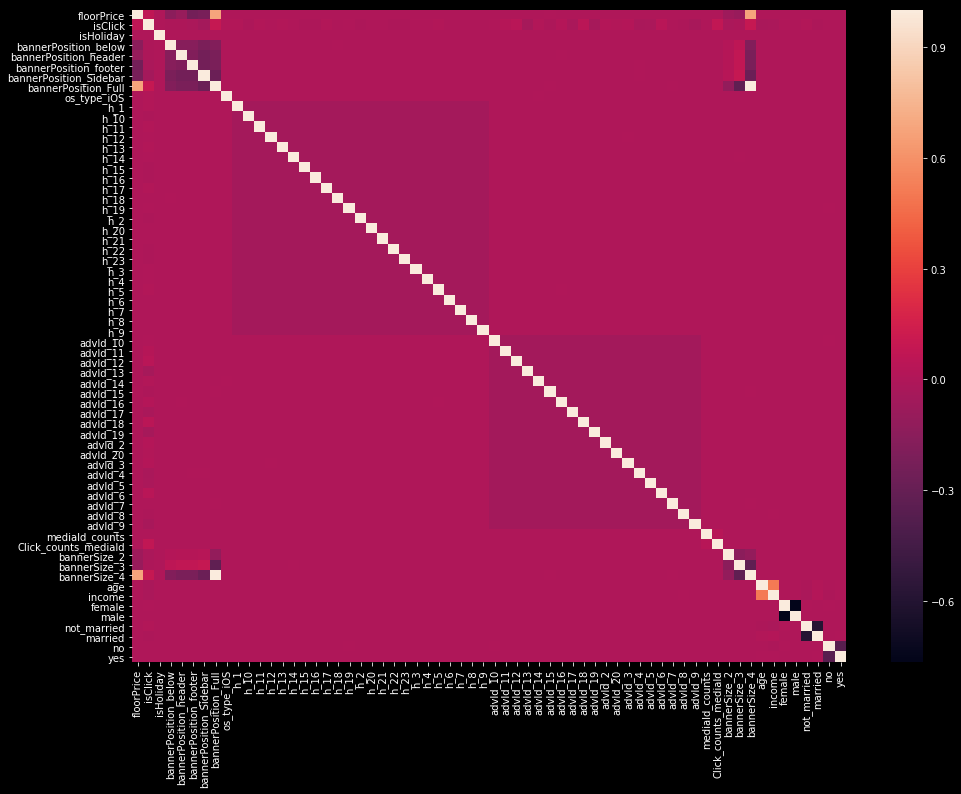

In [138]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_final.corr())
plt.show()

In [139]:
df_final.corr().T

,floorPrice,isClick,isHoliday,bannerPosition_below,bannerPosition_header,bannerPosition_footer,bannerPosition_Sidebar,bannerPosition_Full,os_type_iOS,h_1,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_2,h_20,h_21,h_22,h_23,h_3,h_4,h_5,h_6,h_7,h_8,h_9,advId_10,advId_11,advId_12,advId_13,advId_14,advId_15,advId_16,advId_17,advId_18,advId_19,advId_2,advId_20,advId_3,advId_4,advId_5,advId_6,advId_7,advId_8,advId_9,mediaId_counts,Click_counts_mediaId,bannerSize_2,bannerSize_3,bannerSize_4,age,income,female,male,not_married,married,no,yes
floorPrice,1.000000,0.066762,-0.000110,-0.144959,-0.095894,-0.246529,-0.220450,0.681517,0.000221,-0.000481,-0.000053,0.000099,0.000203,-0.000171,-0.000457,0.000178,0.000580,-0.000386,-0.000127,0.000017,-0.000322,3.555847e-04,0.000048,0.000212,-0.000380,-0.000048,-0.000179,4.266409e-04,0.000230,-0.000183,0.000040,0.000194,-0.000024,-0.000385,4.410013e-04,-0.000782,-0.000124,0.000977,-0.000359,0.000160,0.000525,-4.921935e-04,-0.000091,-0.000221,0.000425,-0.000321,0.000009,-0.000117,0.000573,0.000121,0.000066,-0.001411,-0.002394,-0.070834,-0.088974,0.681517,-0.000198,-0.000569,-0.000182,0.000222,0.000147,-0.000294,0.000174,-0.000147
isClick,0.066762,1.000000,-0.005018,-0.008279,-0.009455,-0.017213,-0.042162,0.093275,0.011864,0.009669,-0.009398,0.009852,0.004201,0.009731,0.001741,-0.007663,-0.008598,0.008990,-0.003192,0.006275,-0.010189,-3.889112e-03,-0.003790,-0.010792,-0.006432,0.002245,0.002631,1.120004e-02,-0.002448,-0.003865,-0.002172,-0.004880,0.004888,0.021397,3.737700e-02,-0.036791,0.010413,-0.010371,0.015654,-0.020751,0.043404,-3.692093e-02,0.021380,0.010606,0.016675,-0.026212,-0.015900,0.038372,-0.005129,-0.009681,-0.031582,-0.003226,0.073054,-0.013597,-0.009978,0.093275,-0.026507,-0.019529,0.002363,-0.002842,0.014134,-0.012778,-0.000211,0.000168
isHoliday,-0.000110,-0.005018,1.000000,0.000071,-0.000040,0.000294,-0.000156,0.000174,0.000182,-0.000114,0.000141,-0.000177,0.000206,0.000126,-0.000064,-0.000479,-0.000389,-0.000104,-0.000225,-0.000175,0.000052,-5.488377e-05,0.000651,0.000291,0.000164,0.000176,0.000363,-1.360829e-04,0.000327,-0.000629,0.000433,-0.000220,0.000678,-0.000304,-3.089737e-04,0.000290,-0.000172,-0.000383,-0.000375,0.000128,0.000384,3.552862e-04,-0.000277,0.000415,0.000051,-0.000161,-0.000612,0.000262,-0.000005,0.000091,0.000288,0.000496,-0.000358,-0.000312,-0.000254,0.000174,0.000140,0.000002,-0.000377,0.000089,0.000155,-0.000138,0.000482,-0.000083
bannerPosition_below,-0.144959,-0.008279,0.000071,1.000000,-0.161027,-0.161239,-0.207511,-0.184566,-0.000424,0.000302,0.000050,0.000186,-0.000053,-0.000075,0.000301,0.000425,-0.000552,-0.000327,0.000889,-0.000449,-0.000287,-1.280453e-04,-0.000014,-0.000092,0.000181,0.000240,-0.000355,5.635719e-05,-0.000450,0.000069,-0.000082,0.000160,0.000334,-0.000027,-3.535526e-04,0.000436,0.000002,-0.000151,-0.000323,-0.000240,0.000013,3.048216e-04,0.000394,0.000353,0.000302,-0.000730,0.000097,0.000141,-0.000361,0.000093,-0.000263,-0.000069,-0.000338,0.021212,0.059847,-0.184566,-0.000159,-0.000204,0.000049,-0.000086,-0.000069,-0.000203,-0.000159,-0.000109
bannerPosition_header,-0.095894,-0.009455,-0.000040,-0.161027,1.000000,-0.190504,-0.245175,-0.218065,0.000426,0.000169,-0.000057,-0.000290,-0.000695,0.000024,0.000065,0.000272,0.000566,0.000507,-0.000223,-0.000491,-0.000566,-1.529015e-04,0.000408,0.000044,0.000334,0.000482,0.000258,7.742114e-05,-0.000200,-0.000101,-0.000247,-0.000033,-0.000308,0.000141,-4.146016e-06,-0.000155,-0.000028,0.000091,0.000938,-0.000158,-0.000041,7.036605e-05,-0.000767,0.000192,0.000003,-0.000263,-0.000113,-0.000278,-0.000065,0.000311,0.000155,-0.000019,-0.000024,0.025402,0.071211,-0.218065,-0.000383,0.000159,-0.000345,0.000147,-0.000287,0.000125,-0.000567,0.000424
bannerPosition_footer,-0.246529,-0.017213,0.000294,-0.161239,-0.190504,1.000000,-0.245498,-0.218352,-0.000013,-0.000060,-0.000016,0.000204,0.000041,0.000223,-0.000028,0.000020,-0.000440,0.000134,0.000013,0.000390,0.000670,-1.439770e-04,-0.000479,-0.0

# preprocess（再開）  

In [140]:
df_final.head(3)

,deviceId,floorPrice,isClick,isHoliday,bannerPosition_below,bannerPosition_header,bannerPosition_footer,bannerPosition_Sidebar,bannerPosition_Full,os_type_iOS,h_1,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_2,h_20,h_21,h_22,h_23,h_3,h_4,h_5,h_6,h_7,h_8,h_9,advId_10,advId_11,advId_12,advId_13,advId_14,advId_15,advId_16,advId_17,advId_18,advId_19,advId_2,advId_20,advId_3,advId_4,advId_5,advId_6,advId_7,advId_8,advId_9,mediaId_counts,Click_counts_mediaId,bannerSize_2,bannerSize_3,bannerSize_4,age,income,female,male,not_married,married,no,yes
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,19392.00,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10106,2841,0,0,1,36.0,458.00000,1,0,0,1,0,1
1,57525600-3f29-4ff9-b236-ea32fc43d78c,6758.20,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10040,3040,0,0,0,52.0,678.00000,1,0,1,0,1,0
2,18221f19-865b-4923-a5a9-ea13239d3aad,8816.15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10006,2582,0,0,0,40.0,537.12563,1,0,0,0,1,0


In [141]:
#df_final = df_final.drop(["bannerSize","floorPrice","mediaId_counts","Click_counts_mediaId",
#                          "age","income"],axis=1)


## standarization 

In [142]:
df_final.head(3)

,deviceId,floorPrice,isClick,isHoliday,bannerPosition_below,bannerPosition_header,bannerPosition_footer,bannerPosition_Sidebar,bannerPosition_Full,os_type_iOS,h_1,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_2,h_20,h_21,h_22,h_23,h_3,h_4,h_5,h_6,h_7,h_8,h_9,advId_10,advId_11,advId_12,advId_13,advId_14,advId_15,advId_16,advId_17,advId_18,advId_19,advId_2,advId_20,advId_3,advId_4,advId_5,advId_6,advId_7,advId_8,advId_9,mediaId_counts,Click_counts_mediaId,bannerSize_2,bannerSize_3,bannerSize_4,age,income,female,male,not_married,married,no,yes
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,19392.00,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10106,2841,0,0,1,36.0,458.00000,1,0,0,1,0,1
1,57525600-3f29-4ff9-b236-ea32fc43d78c,6758.20,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10040,3040,0,0,0,52.0,678.00000,1,0,1,0,1,0
2,18221f19-865b-4923-a5a9-ea13239d3aad,8816.15,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10006,2582,0,0,0,40.0,537.12563,1,0,0,0,1,0


In [143]:
print("------- df_final --------")
print("")  
print("data type:\n",df_final.dtypes)
print("")
print("number of null:\n",df_final.isnull().sum())
print("")
print("data length:\n",df_final.shape)
print("")
print("u_unique:\n",df_final.nunique())
print("")
print("columns:\n",df_final.columns)

------- df_final --------

data type:
 deviceId                   object
floorPrice                float64
isClick                     int64
isHoliday                   int64
bannerPosition_below        uint8
bannerPosition_header       uint8
bannerPosition_footer       uint8
bannerPosition_Sidebar      uint8
bannerPosition_Full         uint8
os_type_iOS                 uint8
h_1                         uint8
h_10                        uint8
h_11                        uint8
h_12                        uint8
h_13                        uint8
h_14                        uint8
h_15                        uint8
h_16                        uint8
h_17                        uint8
h_18                        uint8
h_19                        uint8
h_2                         uint8
h_20                        uint8
h_21                        uint8
h_22                        uint8
h_23                        uint8
h_3                         uint8
h_4                         uint8
h_5      

In [174]:
# データの標準化
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

#list_target = list(df_final.drop(["deviceId","isClick"],axis=1).columns)
list_target = ["floorPrice","mediaId_counts","Click_counts_mediaId","age","income"]
for target in list_target:
    df_final[target] = std.fit_transform(df_final[target].values.reshape(-1,1))

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [175]:
df_final.head(3)

,deviceId,floorPrice,isClick,isHoliday,bannerPosition_below,bannerPosition_header,bannerPosition_footer,bannerPosition_Sidebar,bannerPosition_Full,os_type_iOS,h_1,h_10,h_11,h_12,h_13,h_14,h_15,h_16,h_17,h_18,h_19,h_2,h_20,h_21,h_22,h_23,h_3,h_4,h_5,h_6,h_7,h_8,h_9,advId_10,advId_11,advId_12,advId_13,advId_14,advId_15,advId_16,advId_17,advId_18,advId_19,advId_2,advId_20,advId_3,advId_4,advId_5,advId_6,advId_7,advId_8,advId_9,mediaId_counts,Click_counts_mediaId,bannerSize_2,bannerSize_3,bannerSize_4,age,income,female,male,not_married,married,no,yes
0,cc6f3c56-f35f-4de5-b6a0-6cf8f5fd44c2,3.587898,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.090917,1.229409,0,0,1,-1.013100,-1.047532e+00,1,0,0,1,0,1
1,57525600-3f29-4ff9-b236-ea32fc43d78c,-0.765948,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.405671,1.860767,0,0,0,0.693112,1.865015e+00,1,0,1,0,1,0
2,18221f19-865b-4923-a5a9-ea13239d3aad,-0.056739,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.052666,0.407693,0,0,0,-0.586547,4.515249e-15,1,0,0,0,1,0


In [176]:
X = df_final.drop(["deviceId","isClick"],axis=1).values
y = df_final["isClick"].values

In [178]:
X.shape

(10000000, 63)

In [ ]:
#df_final.columns

In [149]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# OverSampling 

陽性を上手く判別してくれないため、オーバーサンプリングを行う。

In [150]:
X_train.shape

(7000000, 63)

In [155]:
X_train.shape[0]//2

3500000

(array([7546596.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 2453404.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

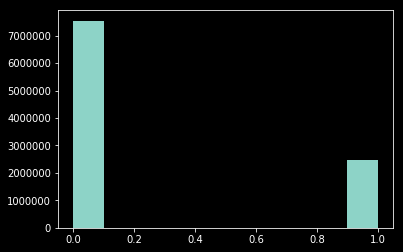

In [156]:
plt.style.use('dark_background')
plt.hist(df_final["isClick"])

In [168]:
from imblearn.over_sampling import RandomOverSampler

In [169]:
ros = RandomOverSampler(ratio = {0:X_train.shape[0], 1:X_train.shape[0]//2}, random_state = 71)

In [170]:
X_train_resampled, y_train_resampled = ros.fit_sample(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/imblearn/utils/validation.py:224: UserWarning: After over-sampling, the number of samples (7000000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 5282773)
  n_samples_majority))


# modeling 

In [148]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## logistic regression

In [173]:
from sklearn.linear_model import LogisticRegression
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [174]:
%%time
lr = LogisticRegression(C=0.1)
#lr.fit(X_train, y_train)
lr.fit(X_train_resampled, y_train_resampled)#  オーバーサンプリングver(0:1=2:1)

CPU times: user 1min 20s, sys: 4.69 s, total: 1min 25s
Wall time: 1min 28s


In [175]:
lr.intercept_

array([-1.10682922])

In [176]:
lr.coef_

array([[-2.23272688e-04, -2.69217049e-02,  8.71374979e-02,
         8.82283817e-02,  4.40982290e-02, -4.57192522e-02,
         2.99171357e-01,  5.90228194e-02, -8.28135756e-03,
        -2.33169025e-01, -1.08207624e-02, -6.19525297e-02,
        -6.05906576e-03, -9.66819463e-02, -2.09369538e-01,
        -2.15432885e-01, -1.92760137e-02, -1.59088702e-01,
        -4.47265201e-02, -2.41103994e-01, -1.57860613e-01,
        -1.62527379e-01, -2.47742921e-01, -1.89122874e-01,
        -9.28291639e-02, -9.05716317e-02,  8.45810811e-03,
        -1.48256214e-01, -1.56338040e-01, -1.48349811e-01,
        -1.70381049e-01,  3.52156452e-01,  5.14635670e-01,
         6.59591204e-01, -1.26947246e-01,  4.06692895e-01,
         1.91669092e-01,  4.57143049e-01,  7.98627245e-02,
         7.10374676e-01, -1.24410547e-01,  5.15438154e-01,
         4.11473822e-01,  4.64151719e-01,  1.55540380e-02,
         1.26919859e-01,  6.69507225e-01,  2.52614544e-01,
         2.01451389e-01, -5.75253617e-02, -1.22185586e-0

In [177]:
#CTR
lr.predict_proba(X_test).T[1]

array([0.48197942, 0.32714319, 0.34818269, ..., 0.34385857, 0.33137318,
       0.39451354])

In [178]:
#import pickle
# モデルの保存
#with open("logisticRegression.pickle","wb") as file:
#    pickle.dump(lr, file)

## SVM

In [383]:
#from sklearn.svm import SVC

In [ ]:
#%%time
#svc = SVC(kernel='linear')
#svc.fit(X_train, y_train)

## LightGBM

In [188]:
import lightgbm as lgb

In [190]:
#lgb_train = lgb.Dataset(X_train, y_train)
lgb_train = lgb.Dataset(X_train_resampled, y_train_resampled)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [191]:
params = {
        'task': 'train',
        'boosting_type': 'gbdt',
        'objective': 'multiclass',
        'metric': {'multi_logloss'},
        'num_class': 2,
        'learning_rate': 0.1,
        'num_leaves': 23,
        'min_data_in_leaf': 1,
        'num_iteration': 20,
        'verbose': 0
}

In [192]:
%%time
gbm = lgb.train(params,
            lgb_train,
            num_boost_round=50,
            valid_sets=lgb_eval,
            early_stopping_rounds=10)

/anaconda3/lib/python3.6/site-packages/lightgbm/engine.py:107: UserWarning: Found `num_iteration` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's multi_logloss: 0.674881
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's multi_logloss: 0.659461
[3]	valid_0's multi_logloss: 0.646485
[4]	valid_0's multi_logloss: 0.635458
[5]	valid_0's multi_logloss: 0.626069
[6]	valid_0's multi_logloss: 0.618053
[7]	valid_0's multi_logloss: 0.611079
[8]	valid_0's multi_logloss: 0.605136
[9]	valid_0's multi_logloss: 0.599927
[10]	valid_0's multi_logloss: 0.595447
[11]	valid_0's multi_logloss: 0.591573
[12]	valid_0's multi_logloss: 0.588186
[13]	valid_0's multi_logloss: 0.585209
[14]	valid_0's multi_logloss: 0.582547
[15]	valid_0's multi_logloss: 0.580211
[16]	valid_0's multi_logloss: 0.578156
[17]	valid_0's multi_logloss: 0.576372
[18]	valid_0's multi_logloss: 0.574712
[19]	valid_0's multi_logloss: 0.573246
[20]	valid_0's multi_logloss: 0.57201
Did not meet early stopping. Best iteration is:
[20]	valid_0's multi_logloss: 0.57201
CPU times: user 3min 18s, sys: 13.6 s, total: 3min 31s
Wall time: 1min 32s


In [193]:
y_test_pred_proba = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_train_pred_proba = gbm.predict(X_train, num_iteration=gbm.best_iteration)

In [194]:
y_test_pred_proba.T[1]

array([0.44311132, 0.36863455, 0.31646896, ..., 0.38012776, 0.37803712,
       0.39827297])

In [197]:
y_pred_test = np.argmax(y_test_pred_proba, axis=1)
#y_pred_train = np.argmax(y_train_pred_proba, axis=1)

## rfc 

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
rfc = RandomForestClassifier(n_estimators=10,max_depth=5)

In [205]:
%%time
#rfc.fit(X_train, y_train)
rfc.fit(X_train_resampled, y_train_resampled)

CPU times: user 4min 52s, sys: 18 s, total: 5min 10s
Wall time: 5min 14s


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

## stacking Classifier 

In [ ]:
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier

In [ ]:
sclf = StackingClassifier(classifiers=[svc, gbm, rfc], 
                          meta_classifier=lr)

In [ ]:
sclf.fit(X_train,y_train)

In [ ]:
# Initializing models

#clf1 = SVC()
#clf2 = lgb.LGBMClassifier()
#clf3 = RandomForestClassifier()
#lr = LogisticRegression()
#sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], 
#                          meta_classifier=lr)


#params = {'randomforestclassifier__n_estimators': [10, 100],
#          'meta-logisticregression__C':[0.1, 3.0],
#          'svc__kernel':["linear"],
    
#          }

#gs_sclf = GridSearchCV(estimator=sclf, 
#                    param_grid=params, 
#                    cv=3,
#                    refit=True)
#gs_sclf.fit(X_train, y_train)

## evaluation（主にtestに関して） 

### Accuracy

lr 

In [179]:
print('train acc: %.3f' % lr.score(X_train, y_train))
print('test acc: %.3f' % lr.score(X_test, y_test))

train acc: 0.747
test acc: 0.747


gbm

SVM 

rfc

In [190]:
print('train acc: %.3f' % rfc.score(X_train, y_train))
print('test acc: %.3f' % rfc.score(X_test, y_test))

train acc: 0.755
test acc: 0.755


Stacking 

In [ ]:
print('train acc: %.3f' % gs_sclf.score(X_train, y_train))
print('test acc: %.3f' % gs_sclf.score(X_test, y_test))

### confusion matrix 

lr

In [180]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr.predict(X_test))

In [181]:
def plot_cm(confmat):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.RdYlGn, alpha=10)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.title('predicted label')
    plt.ylabel('true label')
    plt.tight_layout() 
    plt.show()

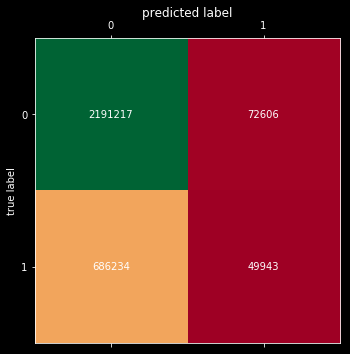

In [182]:
plot_cm(cm)

gbm

In [198]:
cm = confusion_matrix(y_test, y_pred_test)

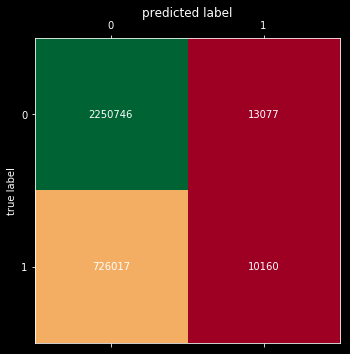

In [199]:
plot_cm(cm)

SVM

rfc

In [192]:
cm = confusion_matrix(y_test, rfc.predict(X_test))

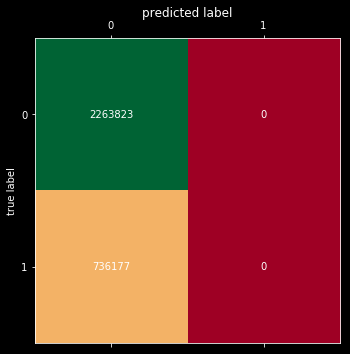

In [193]:
plot_cm(cm)

Stacking 

### ROC Curve and AUC 

lr  

In [183]:
from sklearn import metrics

In [184]:
#fpr, tpr, thresholds = metrics.roc_curve(y_test, lr.predict(X_test))
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, lr.predict_proba(X_test).T[1])
auc = metrics.auc(fpr_lr, tpr_lr)

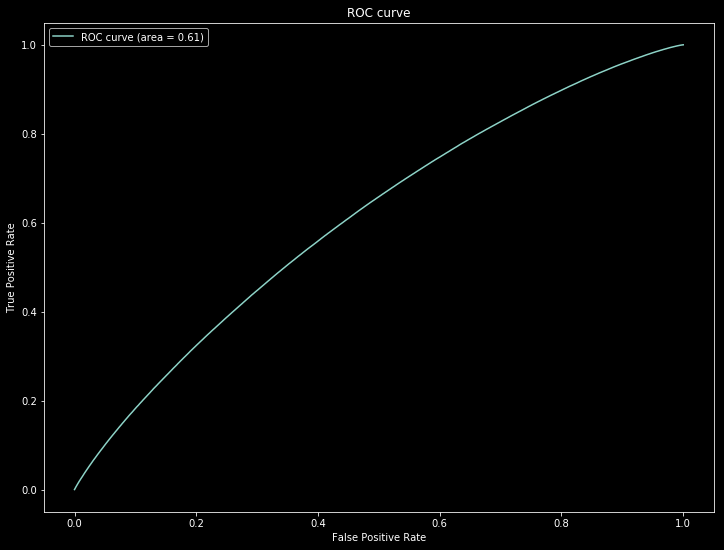

In [185]:
plt.figure(figsize=(12,9))
plt.plot(fpr_lr, tpr_lr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)

gbm 

In [200]:
fpr_gbm, tpr_gbm, thresholds_gbm = metrics.roc_curve(y_test, y_test_pred_proba.T[1])
auc = metrics.auc(fpr_gbm, tpr_gbm)

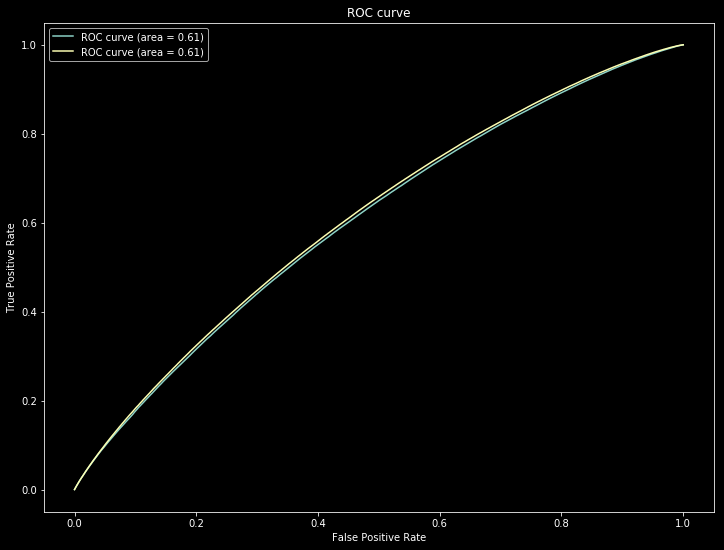

In [201]:
plt.figure(figsize=(12,9))
plt.plot(fpr_gbm, tpr_gbm, label='ROC curve (area = %.2f)'%auc)
plt.plot(fpr_lr, tpr_lr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)

SVM 

rfc

In [206]:
fpr_rfc, tpr_rfc, thresholds_rfc = metrics.roc_curve(y_test, y_test_pred_proba.T[1])
auc = metrics.auc(fpr_rfc, tpr_rfc)

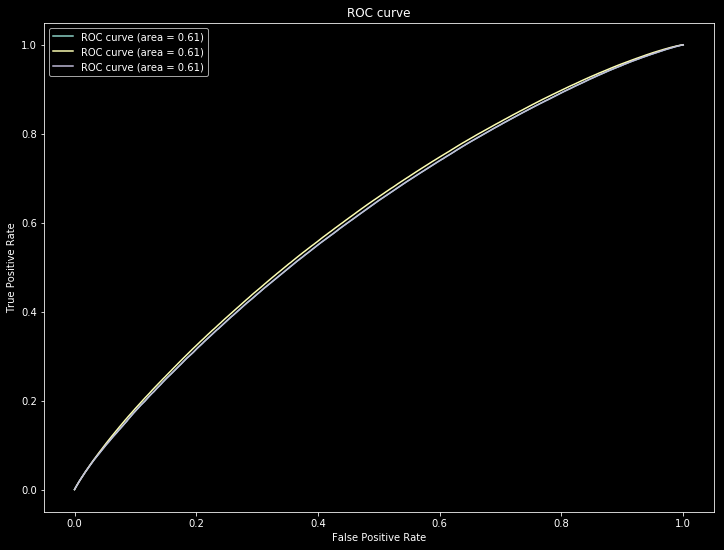

In [207]:
plt.figure(figsize=(12,9))
plt.plot(fpr_gbm, tpr_gbm, label='ROC curve (area = %.2f)'%auc)
plt.plot(fpr_lr, tpr_lr, label='ROC curve (area = %.2f)'%auc)
plt.plot(fpr_rfc, tpr_rfc, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)

Stacking 

### log_loss 

lr 

In [186]:
import scipy as sp
def logloss(act, pred):
    epsilon = 1e-15
    pred = sp.maximum(epsilon, pred)
    pred = sp.minimum(1-epsilon, pred)
    ll = sum(act*sp.log(pred) + sp.subtract(1,act)*sp.log(sp.subtract(1,pred)))
    ll = ll * -1.0/len(act)
    return ll

In [187]:
logloss(y_test, lr.predict_proba(X_test).T[1])

0.56048476617165

gbm

In [202]:
logloss(y_test,  y_test_pred_proba.T[1])

0.5720098818752852

SVM 

rfc 

In [209]:
logloss(y_test, rfc.predict_proba(X_test).T[1])

0.5497061922609198

Stacking 

## evaluation（trainに関して） 

 ### confusion matrix 

lr 

In [371]:
cm = confusion_matrix(y_train, lr.predict(X_train))

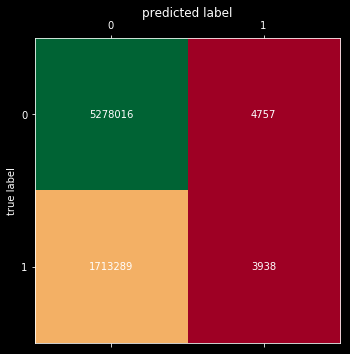

In [372]:
plot_cm(cm)

gbm 

In [373]:
cm = confusion_matrix(y_train,y_pred_train)

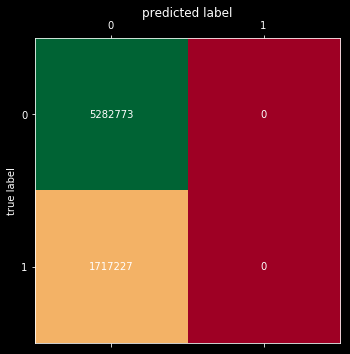

In [374]:
plot_cm(cm)

### ROC Curve and AUC 

lr 

In [378]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, lr.predict_proba(X_train).T[1])
auc = metrics.auc(fpr, tpr)

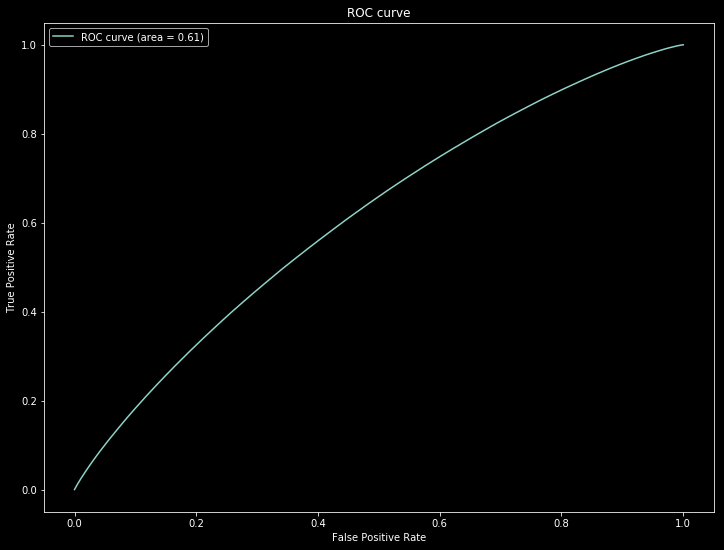

In [379]:
plt.figure(figsize=(12,9))
plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)

gbm

In [380]:
fpr_gbm, tpr_gbm, thresholds_gbm = metrics.roc_curve(y_train, y_train_pred_proba.T[1])
auc = metrics.auc(fpr_gbm, tpr_gbm)

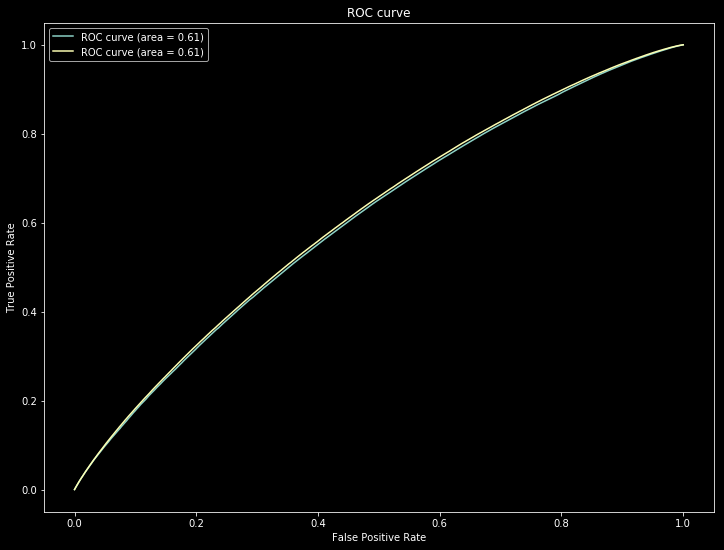

In [381]:
plt.figure(figsize=(12,9))
plt.plot(fpr_gbm, tpr_gbm, label='ROC curve (area = %.2f)'%auc)
plt.plot(fpr_lr, tpr_lr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)

### log_loss 

lr

In [329]:
logloss(y_train, lr.predict_proba(X_train).T[1])

0.5424836484843489

gbm 

In [382]:
logloss(y_train,  y_train_pred_proba.T[1])

0.5479922435880479

In [26]:
df_final.head(2)

NameError: name 'df_final' is not defined

In [210]:
print("使用変数:",df_final.columns)

使用変数: Index(['deviceId', 'floorPrice', 'isClick', 'isHoliday',
       'bannerPosition_below', 'bannerPosition_header',
       'bannerPosition_footer', 'bannerPosition_Sidebar',
       'bannerPosition_Full', 'os_type_iOS', 'h_1', 'h_10', 'h_11', 'h_12',
       'h_13', 'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19', 'h_2', 'h_20',
       'h_21', 'h_22', 'h_23', 'h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8', 'h_9',
       'advId_10', 'advId_11', 'advId_12', 'advId_13', 'advId_14', 'advId_15',
       'advId_16', 'advId_17', 'advId_18', 'advId_19', 'advId_2', 'advId_20',
       'advId_3', 'advId_4', 'advId_5', 'advId_6', 'advId_7', 'advId_8',
       'advId_9', 'mediaId_counts', 'Click_counts_mediaId', 'bannerSize_2',
       'bannerSize_3', 'bannerSize_4', 'age', 'income', 'female', 'male',
       'not_married', 'married', 'no', 'yes'],
      dtype='object')


In [211]:
input = {
    "floorPrice": 19392.00, # ok
    "mediaId": "608", # ok(pickleやったのなら)
    "timestamp": "1535203765",
    "osType": "iOS",
    "bannerSize": 4,
    "bannerPosition": 6,
    "gender": "male",
    "age": 30, # ok
    "income": 12830183, # ok
    "hasChild": "yes",
    "isMarried": "no",
    "advId": 11
}

In [228]:
# floorPrice
def std_floorPrice(price):
    mean = 8.980794e+03	
    std = 2901.756569
    price_std = (price - mean)/std
    return price_std

In [249]:
std_floorPrice(19392)

3.587897796536357

In [241]:
# age 
def std_age(age):
    mean = 45.500342
    std = 9.377507
    age_std = (age - mean)/std
    return age_std

In [250]:
std_age(30)

-1.652927798401004

In [245]:
# income
def std_income(income):
    mean = 537.125630
    std = 75.535335
    income_std = (income - mean)/std
    return income_std

In [254]:
std_income(800)

3.480150978346756

In [305]:
# mediaId
media_dict = mediaId_counts_dict['mediaId_counts']#pickleで保存

In [306]:
click_counts_media_dict = Click_counts_mediaId_dict['Click_counts_mediaId']#pickleで保存

In [291]:
# timestamp
def get_Holiday_and_hour(int):
    ts = datetime.datetime.fromtimestamp(int)
    h = ts.hour
    w = ts.weekday()
    
    hour_dummies_dict 
    weekday_mapping = {0:0,1:0,2:0,3:0,4:0,5:1,6:1}
    return h

In [4]:
test_df = pd.DataFrame(columns=['deviceId', 'floorPrice', 'isClick', 'isHoliday',
       'bannerPosition_below', 'bannerPosition_header',
       'bannerPosition_footer', 'bannerPosition_Sidebar',
       'bannerPosition_Full', 'os_type_iOS', 'h_1', 'h_10', 'h_11', 'h_12',
       'h_13', 'h_14', 'h_15', 'h_16', 'h_17', 'h_18', 'h_19', 'h_2', 'h_20',
       'h_21', 'h_22', 'h_23', 'h_3', 'h_4', 'h_5', 'h_6', 'h_7', 'h_8', 'h_9',
       'advId_10', 'advId_11', 'advId_12', 'advId_13', 'advId_14', 'advId_15',
       'advId_16', 'advId_17', 'advId_18', 'advId_19', 'advId_2', 'advId_20',
       'advId_3', 'advId_4', 'advId_5', 'advId_6', 'advId_7', 'advId_8',
       'advId_9', 'mediaId_counts', 'Click_counts_mediaId', 'bannerSize_2',
       'bannerSize_3', 'bannerSize_4', 'age', 'income', 'female', 'male',
       'not_married', 'married', 'no', 'yes'])

In [5]:
test_df.head()

,deviceId,floorPrice,isClick,isHoliday,bannerPosition_below,bannerPosition_header,bannerPosition_footer,bannerPosition_Sidebar,bannerPosition_Full,os_type_iOS,...,bannerSize_3,bannerSize_4,age,income,female,male,not_married,married,no,yes


In [7]:
"HeLLOOOO".lower()

'helloooo'

In [8]:
def f(x):
    return {
        'a': 1,
        'b': 2,
    }[x]

SyntaxError: invalid syntax (<ipython-input-11-1bba2cdfd3d9>, line 1)

In [19]:
import datetime
def encode_timestamp(timestamp):
    ts = datetime.datetime.fromtimestamp(timestamp)
    h = ts.hour
    w = ts.weekday()

    weekday_mapping = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1}
    return w

In [20]:
encode_timestamp(1535203765)

5

In [24]:
import pickle
import time

In [25]:
%%time
with open("../../data/media_dict.pickle", "rb") as f:
    media_dict = pickle.load(f)

CPU times: user 383 µs, sys: 349 µs, total: 732 µs
Wall time: 478 µs


In [23]:
media_dict

{607: 10304,
 258: 10301,
 762: 10286,
 332: 10272,
 367: 10270,
 844: 10264,
 970: 10246,
 651: 10244,
 211: 10243,
 734: 10241,
 690: 10225,
 994: 10223,
 348: 10212,
 737: 10206,
 744: 10206,
 238: 10203,
 498: 10202,
 799: 10199,
 404: 10197,
 839: 10196,
 745: 10185,
 354: 10184,
 380: 10183,
 226: 10180,
 161: 10178,
 166: 10178,
 459: 10176,
 881: 10176,
 55: 10175,
 456: 10174,
 803: 10174,
 723: 10173,
 378: 10172,
 29: 10171,
 462: 10171,
 19: 10167,
 419: 10167,
 795: 10165,
 413: 10164,
 625: 10164,
 159: 10163,
 50: 10163,
 503: 10161,
 277: 10160,
 954: 10160,
 677: 10159,
 611: 10158,
 681: 10157,
 656: 10156,
 550: 10155,
 291: 10154,
 955: 10154,
 676: 10153,
 294: 10153,
 169: 10153,
 874: 10152,
 216: 10152,
 150: 10150,
 197: 10150,
 491: 10149,
 320: 10149,
 901: 10149,
 62: 10148,
 629: 10146,
 772: 10146,
 700: 10145,
 47: 10145,
 760: 10145,
 383: 10145,
 426: 10145,
 940: 10145,
 692: 10144,
 364: 10144,
 899: 10143,
 153: 10142,
 507: 10141,
 871: 10140,
 401:

In [27]:
import json

In [28]:
with open("../../mlserver/predictor/models/logisticRegression.pickle", "rb") as f:
    model = pickle.load(f)

/anaconda/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.1 when using version 0.18.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [181]:
model.predict_proba(X[0]).T[1]

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0.40415145])

In [182]:
X[0]

array([ 3.58789793,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.0909168 ,  1.22940936,  0.        ,  0.        ,  1.        ,
       -1.01309987, -1.04753238,  1.        ,  0.        ,  0.        ,
        1.        ,  0.        ,  1.        ])